**Prediction using Supervised Machine Learning using Simple Linear Regression**

**In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables.**

In [22]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [23]:
std = pd.read_csv("/content/sample_data/StudentHoursScores.csv")
std.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


In [24]:
std.columns

Index(['Hours', 'Scores'], dtype='object')

In [25]:
std.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [26]:
std.corr()

,Hours,Scores
Hours,1.000000,0.997656
Scores,0.997656,1.000000


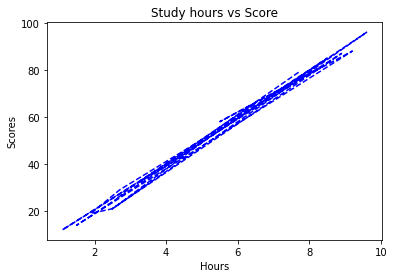

In [27]:
plt.title("Study hours vs Score")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.plot(std["Hours"], std["Scores"], "b--")
plt.show()

In [28]:
x = std.iloc[:, :-1]
y = std.iloc[:, 1]
print(x)
print(y)

    Hours
0     7.7
1     5.9
2     4.5
3     3.3
4     1.1
5     8.9
6     2.5
7     1.9
8     2.7
9     8.3
10    5.5
11    9.2
12    1.5
13    3.5
14    8.5
15    3.2
16    6.5
17    2.5
18    9.6
19    4.3
20    4.1
21    3.0
22    2.6
0     79
1     60
2     45
3     33
4     12
5     87
6     21
7     19
8     29
9     81
10    58
11    88
12    14
13    34
14    85
15    32
16    66
17    21
18    96
19    42
20    40
21    30
22    25
Name: Scores, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print("Prediciton of testing data by model:\n", ypred)

Prediciton of testing data by model:
 [91.81882791 54.56931042 29.40071751 84.7716219  40.47489839]


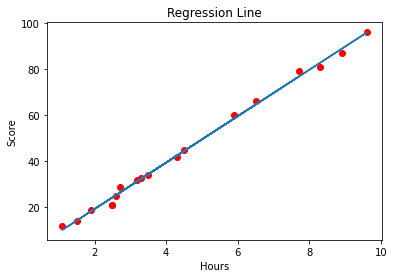

In [31]:
plt.scatter(xtrain, ytrain, color = "red")
plt.plot(xtrain, model.predict(xtrain))
plt.title("Regression Line")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [32]:
print("Coefficient:", model.coef_)
print("Slople/Intercept", model.intercept_)

Coefficient: [10.06743716]
Slople/Intercept -0.8015939692559186


In [33]:
from sklearn.metrics import r2_score

accuracy = r2_score(ytest, ypred)
print("Accuracy of model is:", accuracy*100,"%")

Accuracy of model is: 99.00509060111312 %


In [34]:
ip = float(input("Enter no. of hours: "))
answer = model.predict([[ip]])
print("Predicted score is:", answer)

Enter no. of hours: 9
Predicted score is: [89.80534048]


In [35]:
import math

0 0 0 6502955270.733334
9547.974 1520.06


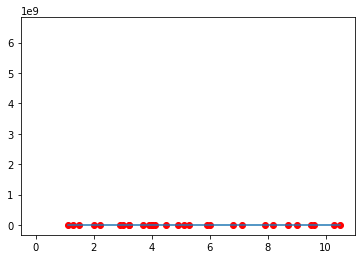

In [36]:
x=np.array([1,2,3,4,5])   # y=3x+2
y = np.array([5,8,11,14,17])
def gradient(x,y):
  a=0
  b=0
  rate=0.01
  n=len(x)
  plt.scatter(x,y,color='red')
  cost_old=0
  for i in range(1000):
    y_pred = a*x+b
    cost = (1/n)*sum([value**2 for value in (y - y_pred)])
    print(a,b,i,cost)
    plt.plot(x,y_pred, cost)
    ad = -(2/n)*sum(x*(y-y_pred))
    yd = -(2/n)*sum(y-y_pred)
    a = a - rate*ad
    b = b-rate*yd
    if math.isclose(cost,cost_old):
      break
    cost_old = cost
    return a,b

df = pd.read_csv("/content/sample_data/Salary_Classification.csv")
x = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

m,b = gradient(x,y)
print(m,b)

**Pickle**

In [37]:
import pickle

In [38]:
with open("modelsave_pickel", "wb") as file:
  pickle.dump(model, file)

In [39]:
with open("modelsave_pickel", "rb") as file:
  newmodel = pickle.load(file)

In [40]:
newmodel.predict([[5]])

array([49.53559183])

In [41]:
newmodel.coef_

array([10.06743716])

**Joblib**

In [42]:
from sklearn.externals import joblib
joblib.dump(model, "model_joblib")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model_joblib']

In [43]:
model = joblib.load("model_joblib")